<a href="https://colab.research.google.com/github/WonminSong/AI/blob/master/fifa19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/AI/fifa")

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/My Drive/AI/fifa/data.csv',index_col='Unnamed: 0')

In [4]:
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean

In [5]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [6]:
data["Name"]

0                  L. Messi
1         Cristiano Ronaldo
2                 Neymar Jr
3                    De Gea
4              K. De Bruyne
                ...        
18202          J. Lundstram
18203    N. Christoffersson
18204             B. Worman
18205        D. Walker-Rice
18206             G. Nugent
Name: Name, Length: 18207, dtype: object

In [7]:
data["ST"]

0        88+2
1        91+3
2        84+3
3         NaN
4        82+3
         ... 
18202    42+2
18203    45+2
18204    45+2
18205    47+2
18206    43+2
Name: ST, Length: 18207, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [9]:
data["Age"].unique()

array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44])

In [10]:
object_columns = data.select_dtypes(include=['object'])

In [11]:
num_columns =data.select_dtypes(exclude=['object'])

In [12]:
object_columns["Value"]

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [13]:
num_columns["Overall"]

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64

In [14]:
data["Club"].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [15]:
data['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [16]:
tigers = data[data['Nationality'] == "Korea Republic"]

In [17]:
tigers

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
125,200104,H. Son,25,https://cdn.sofifa.org/players/4/19/200104.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,84,85,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,€37M,€125K,2079,Right,3.0,5.0,4.0,High/ High,Lean,Yes,LM,7.0,"Aug 28, 2015",NaN,2023,6'0,143lbs,82+3,82+3,82+3,84+3,84+3,84+3,84+3,84+3,83+3,83+3,83+3,82+3,76+3,...,61+3,53+3,53+3,53+3,61+3,78.0,85.0,65.0,79.0,79.0,88.0,81.0,70.0,64.0,85.0,88.0,87.0,82.0,84.0,76.0,86.0,63.0,85.0,63.0,88.0,60.0,39.0,85.0,80.0,71.0,82.0,48.0,34.0,33.0,11.0,13.0,13.0,6.0,10.0,€71.2M
1295,180283,Ki Sung Yueng,29,https://cdn.sofifa.org/players/4/19/180283.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,76,76,Newcastle United,https://cdn.sofifa.org/teams/2/light/13.png,€7.5M,€46K,2010,Right,2.0,4.0,4.0,Medium/ High,Lean,Yes,LCM,4.0,"Jul 1, 2018",NaN,2020,6'2,165lbs,71+2,71+2,71+2,72+2,73+2,73+2,73+2,72+2,74+2,74+2,74+2,73+2,75+2,...,67+2,67+2,67+2,67+2,67+2,73.0,69.0,71.0,84.0,55.0,74.0,76.0,77.0,79.0,80.0,60.0,61.0,67.0,66.0,59.0,82.0,68.0,69.0,70.0,71.0,68.0,54.0,72.0,79.0,76.0,81.0,60.0,70.0,71.0,14.0,9.0,7.0,9.0,10.0,€14.3M
1407,182152,Koo Ja Cheol,29,https://cdn.sofifa.org/players/4/19/182152.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,76,76,FC Augsburg,https://cdn.sofifa.org/teams/2/light/100409.png,€7.5M,€25K,2025,Right,2.0,4.0,3.0,Medium/ Medium,Lean,Yes,CAM,19.0,"Aug 31, 2015",NaN,2019,6'0,174lbs,73+2,73+2,73+2,74+2,74+2,74+2,74+2,74+2,74+2,74+2,74+2,73+2,72+2,...,64+2,61+2,61+2,61+2,64+2,72.0,73.0,65.0,75.0,80.0,80.0,76.0,69.0,71.0,78.0,73.0,62.0,76.0,73.0,75.0,80.0,77.0,72.0,64.0,77.0,54.0,59.0,73.0,72.0,74.0,69.0,57.0,61.0,48.0,11.0,14.0,10.0,15.0,9.0,€12.8M
2002,211927,Kwon Chang Hoon,24,https://cdn.sofifa.org/players/4/19/211927.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,75,79,Dijon FCO,https://cdn.sofifa.org/teams/2/light/110569.png,€8.5M,€13K,1957,Left,1.0,3.0,4.0,Medium/ Medium,Normal,No,RM,22.0,"Jan 18, 2017",NaN,2021,5'9,154lbs,71+2,71+2,71+2,74+2,74+2,74+2,74+2,74+2,75+2,75+2,75+2,74+2,72+2,...,64+2,58+2,58+2,58+2,64+2,74.0,72.0,64.0,76.0,63.0,75.0,75.0,66.0,70.0,78.0,76.0,73.0,80.0,77.0,84.0,75.0,50.0,71.0,53.0,76.0,72.0,61.0,70.0,75.0,55.0,76.0,41.0,54.0,53.0,7.0,16.0,9.0,8.0,8.0,€17.6M
2021,221671,Lee Jae Sung,25,https://cdn.sofifa.org/players/4/19/221671.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,75,78,Holstein Kiel,https://cdn.sofifa.org/teams/2/light/576.png,€8.5M,€13K,1934,Left,2.0,4.0,3.0,High/ High,Lean,No,CAM,7.0,"Jul 27, 2018",NaN,2021,5'11,154lbs,70+2,70+2,70+2,72+2,72+2,72+2,72+2,72+2,74+2,74+2,74+2,73+2,74+2,...,65+2,62+2,62+2,62+2,65+2,65.0,69.0,66.0,78.0,65.0,73.0,65.0,58.0,74.0,74.0,69.0,67.0,76.0,73.0,62.0,69.0,57.0,91.0,69.0,73.0,77.0,67.0,70.0,80.0,44.0,79.0,49.0,54.0,50.0,14.0,7.0,15.0,6.0,8.0,€13.8M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17955,240272,Min Gyeong Min,22,https://cdn.sofifa.org/players/4/19/240272.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,51,59,Daegu FC,https://cdn.sofifa.org/teams/2/lig

In [18]:
mu = data[data['Club'] == "Manchester United"]


In [19]:
barca = data[data['Club'] == "FC Barcelona"]

In [20]:
juven = data[data['Club'] == "Juventus"]

In [21]:
psg = data[data['Club'] == "Paris Saint-Germain"]

In [22]:
oil = data[data['Club'] == "Manchester City"]

In [23]:
real = data[data['Club'] == "Real Madrid"]

In [24]:
bayern = data[data['Club'] == "FC Bayern München"]

In [25]:
tottenham = data[data['Club'] == "Tottenham Hotspur"]

In [26]:
milan = data[data['Club'] == "Milan"]

In [27]:
valencia = data[data["Club"] == "Valencia CF"]

In [28]:
teams = ["tigers","mu","barca","juven","psg","oil","real","bayern","tottenham","milan","valencia"]

In [29]:
teams

['tigers',
 'mu',
 'barca',
 'juven',
 'psg',
 'oil',
 'real',
 'bayern',
 'tottenham',
 'milan',
 'valencia']

In [30]:
mu

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
45,195864,P. Pogba,25,https://cdn.sofifa.org/players/4/19/195864.png,France,https://cdn.sofifa.org/flags/18.png,87,91,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€64M,€210K,2247,Right,4.0,4.0,5.0,High/ Low,Normal,Yes,RDM,6.0,"Aug 9, 2016",NaN,2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,...,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,192505,R. Lukaku,25,https://cdn.sofifa.org/players/4/19/192505.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,89,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€62.5M,€230K,2031,Left,3.0,3.0,3.0,Medium/ Medium,Stocky,Yes,ST,9.0,"Jul 10, 2017",NaN,2022,6'3,207lbs,84+3,84+3,84+3,79+3,81+3,81+3,81+3,79+3,78+3,78+3,78+3,79+3,72+3,...,57+3,54+3,54+3,54+3,57+3,78.0,87.0,86.0,77.0,79.0,80.0,74.0,66.0,73.0,72.0,77.0,90.0,60.0,86.0,46.0,88.0,71.0,84.0,94.0,74.0,75.0,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
93,184941,A. Sánchez,29,https://cdn.sofifa.org/players/4/19/184941.png,Chile,https://cdn.sofifa.org/flags/55.png,85,85,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€37.5M,€215K,2172,Right,4.0,3.0,4.0,High/ High,Normal,Yes,RW,7.0,"Jan 22, 2018",NaN,2022,5'7,163lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,77+3,...,62+3,57+3,57+3,57+3,62+3,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,86.0,86.0,79.0,90.0,83.0,87.0,84.0,87.0,83.0,72.0,81.0,79.0,46.0,84.0,82.0,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,€69.4M
116,211300,A. Martial,22,https://cdn.sofifa.org/players/4/19/211300.png,France,https://cdn.sofifa.org/flags/18.png,84,90,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€42.5M,€165K,2064,Right,3.0,3.0,4.0,Medium/ Medium,Normal,Yes,LW,11.0,"Sep 1, 2015",NaN,2019,6'0,168lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,80+3,80+3,80+3,81+3,73+3,...,61+3,54+3,54+3,54+3,61+3,76.0,84.0,69.0,77.0,74.0,87.0,84.0,54.0,60.0,86.0,88.0,89.0,85.0,81.0,81.0,84.0,74.0,75.0,75.0,80.0,58.0,42.0,83.0,73.0,81.0,79.0,38.0,39.0,36.0,9.0,8.0,8.0,15.0,11.0,€87.1M
132,191202,N. Matić,29,https://cdn.sofifa.org/players/4/19/191202.png,Serbia,https://cdn.sofifa.org/flags/51.png,84,84,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€24M,€165K,2100,Left,3.0,3.0,3.0,Medium/ High,Lean,Yes,CDM,31.0,"Jul 31, 2017",NaN,2020,6'4,187lbs,73+3,73+3,73+3,72+3,74+3,74+3,74+3,72+3,74+3,74+3,74+3,74+3,79+3,...,77+3,80+3,80+3,80+3,77+3,71.0,64.0,74.0,84.0,73.0,80.0,72.0,67.0,83.0,79.0,52.0,59.0,44.0,83.0,50.0,83.0,67.0,84.0,85.0,75.0,80.0,86.0,69.0,73.0,64.0,84.0,83.0,84.0,75.0,7.0,15.0,12.0,14.0,9.0,€44.4M
211,178088,Juan Mata,3

In [31]:
tigers["Club"].unique()

array(['Tottenham Hotspur', 'Newcastle United', 'FC Augsburg',
       'Dijon FCO', 'Holstein Kiel', 'Stade de Reims', 'Daegu FC',
       'Ulsan Hyundai FC', 'Suwon Samsung Bluewings', 'Jeju United FC',
       'Jeonbuk Hyundai Motors', 'Hamburger SV', 'Kashima Antlers',
       'FC Seoul', 'Kawasaki Frontale', 'Gamba Osaka', 'Pohang Steelers',
       'Jeonnam Dragons', 'Kashiwa Reysol', 'Incheon United FC',
       'Hellas Verona', 'Valencia CF', 'VfL Bochum 1848', 'FC Tokyo',
       'Gangwon FC', 'Cerezo Osaka', 'Seattle Sounders FC',
       'Sangju Sangmu FC', 'Shonan Bellmare', 'Gyeongnam FC',
       'Vissel Kobe', 'Sagan Tosu', 'Tianjin Quanjian FC', 'Girona FC',
       'Shimizu S-Pulse', 'Yokohama F. Marinos',
       'Hokkaido Consadole Sapporo', 'V-Varen Nagasaki', 'FC St. Pauli',
       'Vegalta Sendai', 'Karlsruher SC', 'MSV Duisburg', 'LASK Linz',
       'SpVgg Unterhaching'], dtype=object)

In [32]:
tigers_num = tigers.select_dtypes(exclude = ["object"])

In [33]:
tigers_num.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [34]:
teams

['tigers',
 'mu',
 'barca',
 'juven',
 'psg',
 'oil',
 'real',
 'bayern',
 'tottenham',
 'milan',
 'valencia']

In [35]:
mu = mu.select_dtypes(exclude=['object'])
barca = barca.select_dtypes(exclude=['object'])
juven = juven.select_dtypes(exclude=['object'])
psg = psg.select_dtypes(exclude=['object'])
oil = oil.select_dtypes(exclude=['object'])
real = real.select_dtypes(exclude=['object'])
bayern = bayern.select_dtypes(exclude=['object'])
tottenham = tottenham.select_dtypes(exclude=['object'])
milan = milan.select_dtypes(exclude=['object'])
valencia = valencia.select_dtypes(exclude=['object'])

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


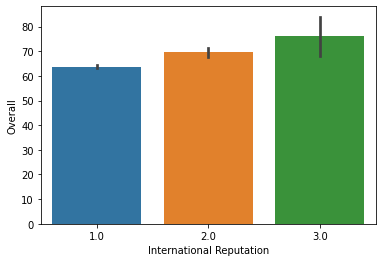

In [37]:
sns.barplot(x="International Reputation",y="Overall",data=tigers_num);
#평판이 좋을 수록 오버롤이 높다

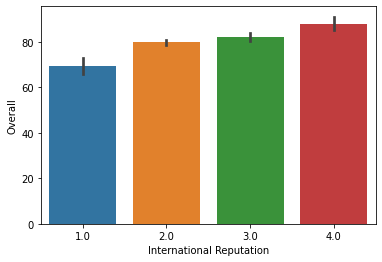

In [38]:
sns.barplot(x="International Reputation",y="Overall",data=mu);
#평판이 좋을 수록 오버롤이 높다22

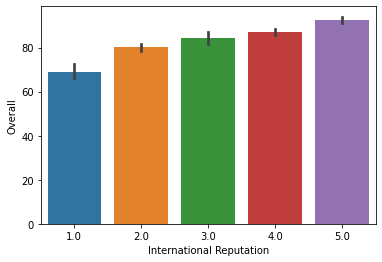

In [39]:
sns.barplot(x="International Reputation",y="Overall",data=barca);
#평판이 좋을 수록 오버롤이 높다33

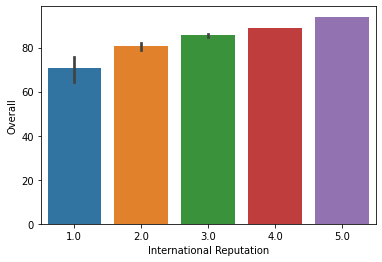

In [40]:
sns.barplot(x="International Reputation",y="Overall",data=juven);
#평판이 좋을 수록 오버롤이 높다44

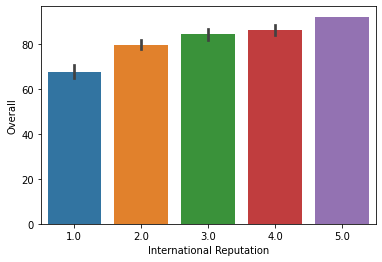

In [41]:
sns.barplot(x="International Reputation",y="Overall",data=psg);
#평판이 좋을 수록 오버롤이 높다55

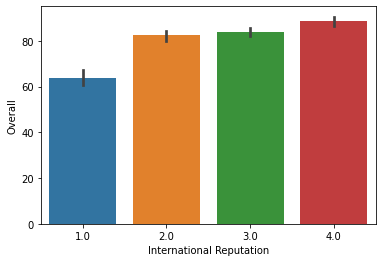

In [42]:
sns.barplot(x="International Reputation",y="Overall",data=oil);
#평판이 좋을 수록 오버롤이 높다66

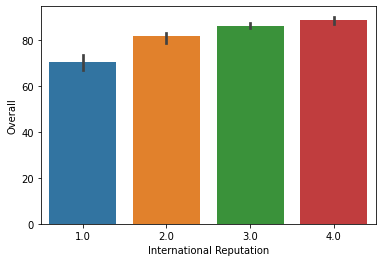

In [43]:
sns.barplot(x="International Reputation",y="Overall",data=real);
#평판이 좋을 수록 오버롤이 높다77

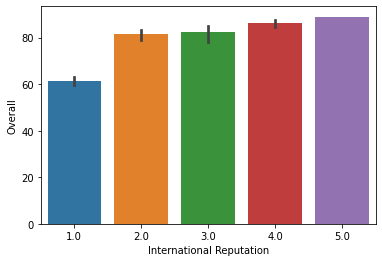

In [44]:
sns.barplot(x="International Reputation",y="Overall",data=bayern);
#평판이 좋을 수록 오버롤이 높다88

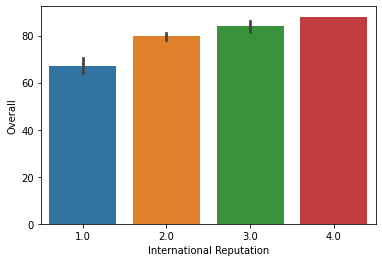

In [45]:
sns.barplot(x="International Reputation",y="Overall",data=tottenham);
#평판이 좋을 수록 오버롤이 높다99

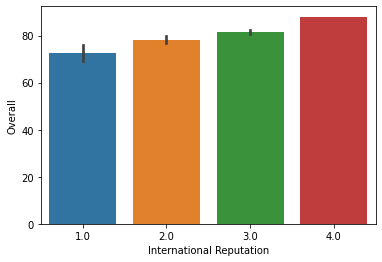

In [46]:
sns.barplot(x="International Reputation",y="Overall",data=milan);
#평판이 좋을 수록 오버롤이 높다

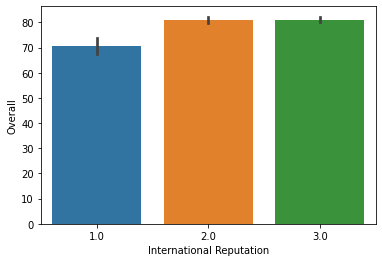

In [47]:
sns.barplot(x="International Reputation",y="Overall",data=valencia);
#평판이 좋을 수록 오버롤이 높다11

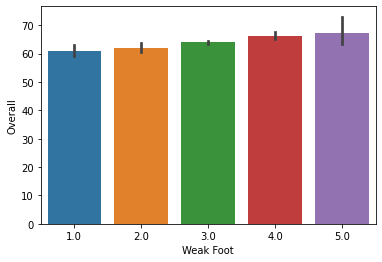

In [48]:
sns.barplot(x="Weak Foot",y="Overall",data=tigers_num);
#약발을 잘 쓸수록 오버롤이 높다

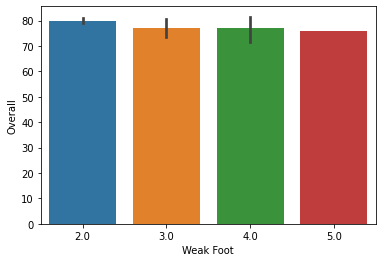

In [49]:
sns.barplot(x="Weak Foot",y="Overall",data=mu);
#맨유 선수들은 한쪽발을 더 강화하면 오버롤이 높다

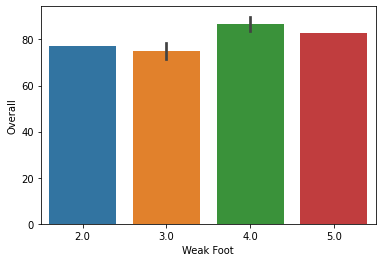

In [50]:
sns.barplot(x="Weak Foot",y="Overall",data=barca);
#바르셀로나 선수들은 약발과 오버롤이 큰 관계가 없지만 그래도 약발을 잘 써야 오버롤이 높다

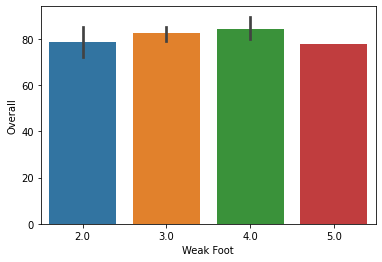

In [51]:
sns.barplot(x="Weak Foot",y="Overall",data=juven);
#유벤투스 선수들은 약발과 오버롤이 큰 관련이 없다

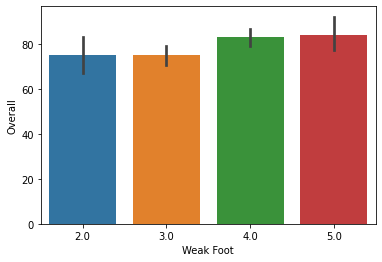

In [52]:
sns.barplot(x="Weak Foot",y="Overall",data=psg);
#파리생제르망 선수들은 약발을 잘 쓰면 오버롤이 높다

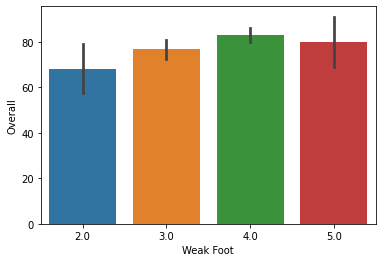

In [53]:
sns.barplot(x="Weak Foot",y="Overall",data=oil);
#맨시티 선수들은 약발을 잘 쓰면 대체적으로 오버롤이 높다

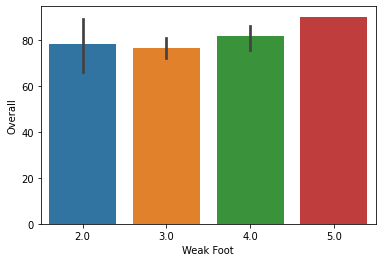

In [54]:
sns.barplot(x="Weak Foot",y="Overall",data=real);
#레알 마드리드 선수들은 약발을 잘 쓰면 대체적으로 오버롤이 높다

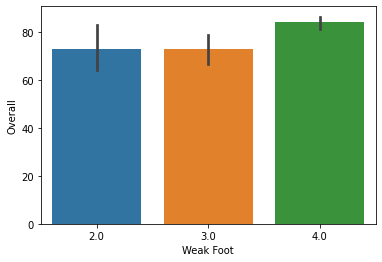

In [55]:
sns.barplot(x="Weak Foot",y="Overall",data=bayern);
#뮌헨 선수들은 약발을 잘 쓰면 대체적으로 오버롤이 높다

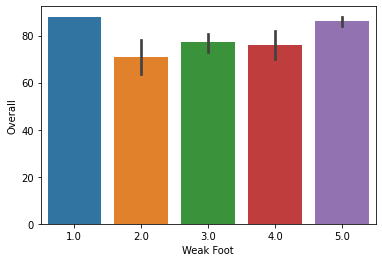

In [56]:
sns.barplot(x="Weak Foot",y="Overall",data=tottenham);
#한쪽발을 잘 쓰거나 약발을 잘 쓰면 오버롤이 높다

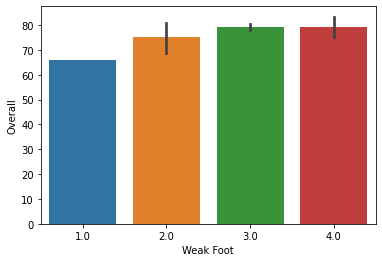

In [57]:
sns.barplot(x="Weak Foot",y="Overall",data=milan);
#밀란 선수들은 약발을 잘 쓸수록 오버롤이 높다

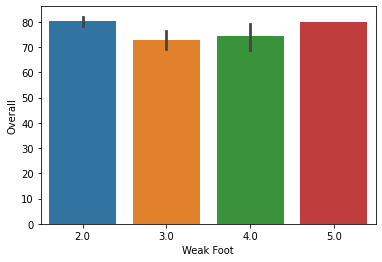

In [58]:
sns.barplot(x="Weak Foot",y="Overall",data=valencia);
#발렌시아 선수들은 약발을 잘 쓰거나 양발을 잘 쓰면 오버롤이 높다

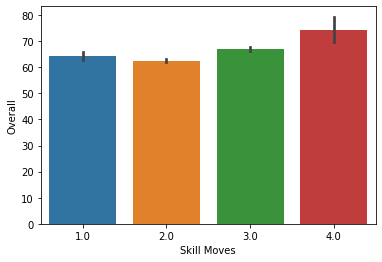

In [59]:
sns.barplot(x="Skill Moves",y="Overall",data=tigers_num);
#개인기가 높을수록 오버롤이 높다

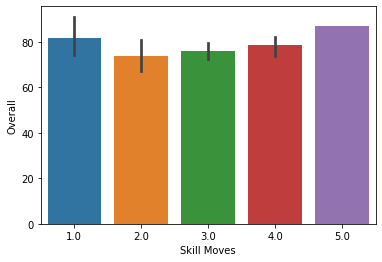

In [60]:
sns.barplot(x="Skill Moves",y="Overall",data=mu);
#맨유 선수들은 개인기가 오버롤에 큰 관련이 없다

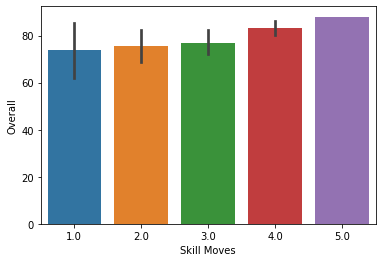

In [61]:
sns.barplot(x="Skill Moves",y="Overall",data=barca);
#바르셀로나 선수들은 개인기가 높을수록 오버롤이 높다

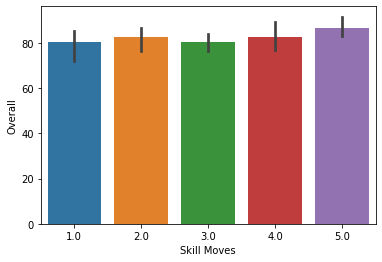

In [62]:
sns.barplot(x="Skill Moves",y="Overall",data=juven);
#유벤투스 선수들은 대체적으로 개인기가 높을수록 오버롤이 높다

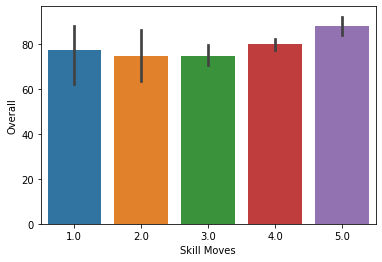

In [63]:
sns.barplot(x="Skill Moves",y="Overall",data=psg);
#파리 생제르망 선수들은 보통 개인기가 높을수록 오버롤이 높다

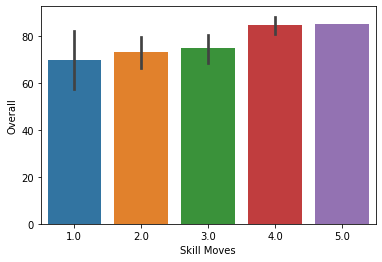

In [64]:
sns.barplot(x="Skill Moves",y="Overall",data=oil);
#맨시티 선수들은 개인기가 높을수록 오버롤이 높다

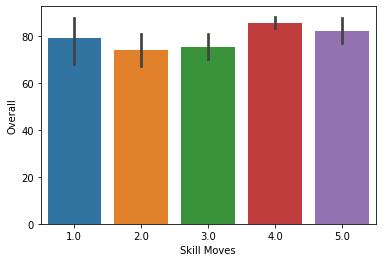

In [65]:
sns.barplot(x="Skill Moves",y="Overall",data=real);
#레알마드리드 선수들은 개인기가 오버롤에 크게 영향을 끼치지 않는다

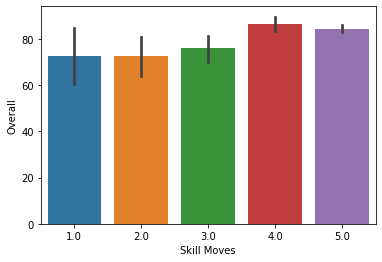

In [66]:
sns.barplot(x="Skill Moves",y="Overall",data=bayern);
#뮌헨 선수들은 개인기가 높을수록 오버롤이 높다

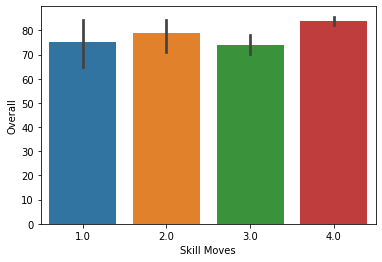

In [67]:
sns.barplot(x="Skill Moves",y="Overall",data=tottenham);
#토트넘 선수들은 대체적으로 개인기가 높을수록 오버롤이 높다

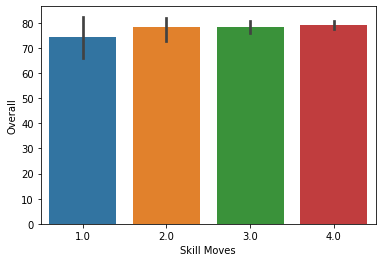

In [68]:
sns.barplot(x="Skill Moves",y="Overall",data=milan);
#밀란 선수들은 개인기가 높을수록 오버롤이 높다

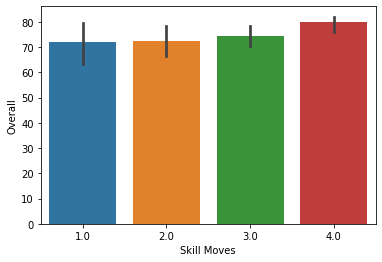

In [69]:
sns.barplot(x="Skill Moves",y="Overall",data=valencia);
#발렌시아 선수들은 개인기가 높을수록 오버롤이 높다

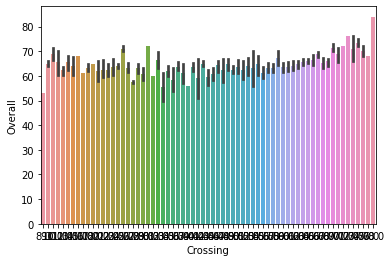

In [70]:
sns.barplot(x="Crossing",y="Overall",data=tigers_num);

In [71]:
tigers_num["Crossing"].unique()

array([78., 73., 72., 74., 65., 58., 11., 69., 52., 25., 71., 30., 10.,
       75., 70., 51., 54., 50., 14., 66., 62., 61., 63., 32., 53., 67.,
       13., 26., 48., 20., 60., 59., 36., 15., 47., 76., 21., 23., 64.,
       68., 55., 56., 46., 43., 35., 41., 40., 22., 42., 57.,  9., 17.,
       18., 28., 37., 24., 12., 45., 49., 29., 34., nan, 33., 16., 31.,
       27., 39.,  8.])

In [72]:
tigers_num["Finishing"].unique()

array([85., 69., 73., 72., 18., 70., 12., 57., 23., 26., 43., 16., 60.,
       62., 71., 59., 66., 24., 68., 65., 36., 54., 31., 58., 64., 63.,
       19., 61., 10., 38., 67., 13., 34., 53., 17., 15., 55., 74., 33.,
       50., 49., 56., 39., 32., 14., 11., 22., 42., 44., 21., 30., 28.,
       51., 47., 35., 25., 45., 37., 48., 52., nan, 27.,  8.,  9., 40.,
        5.,  6., 29., 41.])

In [73]:
tigers_num["BallControl"].unique()

array([85., 80., 78., 74., 76., 18., 22., 66., 47., 69., 58., 24., 72.,
       14., 67., 68., 71., 65., 10., 55., 75., 73., 70., 37., 25., 56.,
       53., 62., 63., 64., 17., 61., 35., 60., 20., 54., 15., 59., 52.,
       16., 43., 21., 45., 36., 57., 44., 41., 19., 33., 48., 23., nan,
       39., 27., 46., 31., 12., 13., 50., 40., 51., 49.])

수치들은 선수별로 다 달라서 unique 값이 많은 것 같다

보통의 경우에는 양발을 잘 사용하고 개인기가 높은 선수들이 높은 오버롤을 가지고 있지만
메시나 호날두, 라모스등 스타플레이어급의 선수들을 많이 보유한 바르셀로나, 레알 마드리드, 유벤투스는 다른 요소에 의하여 약발이나 개인기가 큰 영향을 주지 않을 때도 있다

In [74]:
tigers_num = tigers_num.fillna(tigers_num.mean())

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y,preds):
    return sqrt(mean_squared_error(preds, y))

In [77]:
x = tigers_num
X = x.drop("Overall",axis=1)
y = x["Overall"]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
porsche = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
porsche.fit(train_X, train_y)
pagani = RandomForestRegressor(random_state=1)
pagani.fit(train_X, train_y)
    
    
val_predictions = porsche.predict(val_X)
val_mae = rmse(val_predictions, val_y)
print("DecisionTreeRegressor score: {:.0f}".format(val_mae))

val_predictions = pagani.predict(val_X)
val_mae = rmse(val_predictions, val_y)
print("RandomForestRegressor score: {:.0f}".format(val_mae))

DecisionTreeRegressor score: 2
RandomForestRegressor score: 2


In [78]:
def test(x):
    X = x.drop("Overall",axis=1)
    y = x["Overall"]
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    val_predictions = porsche.predict(val_X)
    val_mae = rmse(val_predictions, val_y)
    print("DecisionTreeRegressor score: {:.0f}".format(val_mae))

    val_predictions = pagani.predict(val_X)
    val_mae = rmse(val_predictions, val_y)
    print("RandomForestRegressor score: {:.0f}".format(val_mae))

In [79]:
test(mu)

DecisionTreeRegressor score: 4
RandomForestRegressor score: 5


In [80]:
test(barca)

DecisionTreeRegressor score: 6
RandomForestRegressor score: 7


In [81]:
test(juven)

DecisionTreeRegressor score: 8
RandomForestRegressor score: 10


In [82]:
test(psg)

DecisionTreeRegressor score: 7
RandomForestRegressor score: 8


In [83]:
test(oil)

DecisionTreeRegressor score: 7
RandomForestRegressor score: 6


In [84]:
test(real)

DecisionTreeRegressor score: 9
RandomForestRegressor score: 8


In [85]:
test(bayern)

DecisionTreeRegressor score: 8
RandomForestRegressor score: 7


In [86]:
test(tottenham)

DecisionTreeRegressor score: 5
RandomForestRegressor score: 6


In [87]:
test(milan)

DecisionTreeRegressor score: 5
RandomForestRegressor score: 6


In [88]:
test(valencia)

DecisionTreeRegressor score: 5
RandomForestRegressor score: 5


한국의 각 feature별 오버롤로 학습시키고 각 구단에 적용시켜 보았을 때 score가 4부터 10까지 다양하게 나와서 중간쯤인 바르셀로나로 학습시켜본다

In [89]:
x = barca
X = x.drop("Overall",axis=1)
y = x["Overall"]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
porsche = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
porsche.fit(train_X, train_y)
pagani = RandomForestRegressor(random_state=1)
pagani.fit(train_X, train_y)
    
    
val_predictions = porsche.predict(val_X)
val_mae = rmse(val_predictions, val_y)
print("DecisionTreeRegressor score: {:.0f}".format(val_mae))

val_predictions = pagani.predict(val_X)
val_mae = rmse(val_predictions, val_y)
print("RandomForestRegressor score: {:.0f}".format(val_mae))

DecisionTreeRegressor score: 6
RandomForestRegressor score: 2


In [90]:
test(mu)

DecisionTreeRegressor score: 6
RandomForestRegressor score: 4


In [91]:
test(juven)

DecisionTreeRegressor score: 5
RandomForestRegressor score: 2


In [92]:
test(psg)

DecisionTreeRegressor score: 5
RandomForestRegressor score: 2


In [93]:
test(oil)

DecisionTreeRegressor score: 8
RandomForestRegressor score: 5


In [94]:
test(real)

DecisionTreeRegressor score: 7
RandomForestRegressor score: 3


In [95]:
test(bayern)

DecisionTreeRegressor score: 6
RandomForestRegressor score: 3


In [96]:
test(tottenham)

DecisionTreeRegressor score: 7
RandomForestRegressor score: 4


In [97]:
test(milan)

DecisionTreeRegressor score: 12
RandomForestRegressor score: 5


In [98]:
test(valencia)

DecisionTreeRegressor score: 8
RandomForestRegressor score: 4


비슷한 성향의 구단 일거라고 생각해서 중심으로 바르샤를 잡았는데 그래도 score가 높게 나온다

barplot말고 다른 그래프도 이용하고 싶다